In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc

%matplotlib inline

In [2]:
train = pd.read_csv('../training-set.csv',header=None)
test = pd.read_csv('../testing-set.csv',header=None)
train.columns = ['file_id','target']
test.columns = ['file_id','target']

file_df = pd.read_csv('file_df.csv')
file_df.drop(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C_last', 'Cm1', 'Cm2',
       'Cm3', 'Cm4', 'Cm5', 'Cm6', 'Cm_last', 'Cm_sum', 'C_mean', 'C_median',
       'C_std', 'C_min', 'C_max', 'Cm_mean', 'Cm_median', 'Cm_std', 'Cm_min',
       'Cm_max', 'C1_C2', 'Cfirst_Clast', 'Cmax_Cmin', 'Cm1_Cm2',
       'Cmfirst_Cmlast', 'Cmmax_Cmmin', 'Cmpermax_Cmpermin'],axis=1,inplace=True)


data = pd.concat([train,test],axis=0)
data = pd.merge(data,file_df,how='left',on='file_id')



week_cnt = pd.read_csv('week_cnt.csv')

product_cnt = pd.read_csv('../product_cnt.csv')
product_cnt = product_cnt.fillna(0)

cust_prod = pd.read_csv('../cust_prod.csv')
cust_prod.drop('file_freq_sum',axis=1,inplace=True)

hr_int = pd.read_csv('../hr_int.csv')

hour_cnt = pd.read_csv('../hour_interval_cnt.csv')

minute_cnt = pd.read_csv('../min_interval_cnt.csv')

sec_cnt = pd.read_csv('../sec_interval_cnt.csv')

cchrint = pd.read_csv('../hour_interval_cust_cnt.csv')

ccminint = pd.read_csv('../min_interval_cust_cnt.csv')

ccsecint = pd.read_csv('../sec_interval_cust_cnt.csv')

#hourper = pd.read_csv('../hour_cnt.csv')

#minuteper = pd.read_csv('../minute_cnt.csv')

#secper = pd.read_csv('../sec_cnt.csv')

In [3]:
data = pd.merge(data,week_cnt,how='outer',on='file_id')
data = pd.merge(data,product_cnt,how='outer',on='file_id')
data = pd.merge(data,cust_prod,how='outer',on='file_id')
data = pd.merge(data,hr_int,how='outer',on='file_id')
data = pd.merge(data,hour_cnt,how='outer',on='file_id')
data = pd.merge(data,minute_cnt,how='outer',on='file_id')
data = pd.merge(data,sec_cnt,how='outer',on='file_id')
data = pd.merge(data,cchrint,how='outer',on='file_id')
data = pd.merge(data,ccminint,how='outer',on='file_id')
data = pd.merge(data,ccsecint,how='outer',on='file_id')
#data = pd.merge(data,hourper,how='outer',on='file_id')
#data = pd.merge(data,minuteper,how='outer',on='file_id')
#data = pd.merge(data,secper,how='outer',on='file_id')


In [4]:
data['hr_int1'] = (data['hr_int1'] / data['C_sum'])
data['hr_int2'] = (data['hr_int2'] / data['C_sum'])
data['hr_int3'] = (data['hr_int3'] / data['C_sum'])
data['hr_int4'] = (data['hr_int4'] / data['C_sum'])

data['hour_interval1'] = (data['hour_interval1'] / data['C_sum'])
data['hour_interval2'] = (data['hour_interval2'] / data['C_sum'])
data['hour_interval3'] = (data['hour_interval3'] / data['C_sum'])
data['hour_interval4'] = (data['hour_interval4'] / data['C_sum'])

data['min_interval1'] = (data['min_interval1'] / data['C_sum'])
data['min_interval2'] = (data['min_interval2'] / data['C_sum'])
data['min_interval3'] = (data['min_interval3'] / data['C_sum'])
data['min_interval4'] = (data['min_interval4'] / data['C_sum'])

data['sec_interval1'] = (data['sec_interval1'] / data['C_sum'])
data['sec_interval2'] = (data['sec_interval2'] / data['C_sum'])
data['sec_interval3'] = (data['sec_interval3'] / data['C_sum'])
data['sec_interval4'] = (data['sec_interval4'] / data['C_sum'])

data['cchrinte1'] = data['cchrinte1']/ data['cust_cnt']
data['cchrinte2'] = data['cchrinte2']/ data['cust_cnt']
data['cchrinte3'] = data['cchrinte3']/ data['cust_cnt']
data['cchrinte4'] = data['cchrinte4']/ data['cust_cnt']

data['ccmininte1'] = data['ccmininte1']/ data['cust_cnt']
data['ccmininte2'] = data['ccmininte2']/ data['cust_cnt']
data['ccmininte3'] = data['ccmininte3']/ data['cust_cnt']
data['ccmininte4'] = data['ccmininte4']/ data['cust_cnt']

data['ccsecinte1'] = data['ccsecinte1']/ data['cust_cnt']
data['ccsecinte2'] = data['ccsecinte2']/ data['cust_cnt']
data['ccsecinte3'] = data['ccsecinte3']/ data['cust_cnt']
data['ccsecinte4'] = data['ccsecinte4']/ data['cust_cnt']
data.drop(['C_sum'],axis=1,inplace=True)

In [5]:
np.sum(np.sum(pd.isnull(data)))

0

# mean encoding

In [6]:
#meancode = pd.read_csv('caticnt.csv')
meancode = pd.read_csv('caticnt_val.csv')
data = pd.merge(data,meancode,how='left',on='file_id')

In [7]:
data['cat0cnt'] = data['cat0cnt']+data['cat1cnt']+data['cat2cnt']

In [8]:
data.drop(['Cper2', 'Cper3', 'Cper_last', 'Cmper2', 'Cmper3', 'Cmper5', 'Cmper_last', 'Cmper_median', 'Cmper_std', 'Cmper_min',
 'Cmper_max', 'Cper_mean', 'Cper_std', 'Cper_min', 'Cper_max', 'Cpermax_Cpermin', 'Cmperfirst_Cmperlast',
 'w1', 'w4', 'w5', 'w7',
 '0374c4', '05b409', '0cdb7a', '218578', '262880', '26a5d0', '3c2be6', '533133', '75f310', '8452da',
 '8541a0', '8b7f69', 'a310bb', 'aaa9c8', 'b93794', 'cc3a6a', 'd465fc', 'dd8d4a', 'fec24f',
 'hr_int1', 'hour_interval1', 'hour_interval3', 'hour_interval4',
 'min_interval3', 'min_interval4',
 'sec_interval2', 'sec_interval4',
 'cchrinte1', 'cchrinte2', 'cchrinte3', 'cchrinte4',
 'ccsecinte1', 'ccsecinte4',
 'cat1cnt','cat2cnt' ],axis=1,inplace=True)

In [9]:
data = data.fillna(0)

In [10]:
newfeat=pd.read_csv('qcgp_feat.csv')
data = pd.merge(data,newfeat,how='left',on='file_id')

In [11]:
#for testing
df_train = data[data['target']!=0.5] 
df_test  = data[data['target']==0.5]
#######for val

df_test = df_train[(df_train['first_day']>49)&(df_train['first_day']<57)]

df_train = df_train[df_train['first_day']<50]
#######for val

In [12]:
y_train = df_train['target']
y_test = df_test['target']
train = df_train.drop(['file_id','target','first_day','last_day'],axis=1)
test = df_test.drop(['file_id','target','first_day','last_day'],axis=1)

In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train)
value_train = scaler.transform(train)
value_test  = scaler.transform(test)

In [14]:
train = pd.DataFrame(value_train,columns=train.columns)
test = pd.DataFrame(value_test,columns=train.columns)

In [15]:
train.shape , test.shape

((43943, 58), (5392, 58))

# XGBoost

In [16]:
import xgboost as xgb

In [17]:
dtrain = xgb.DMatrix(train, label=y_train,missing = -999.0)
dval = xgb.DMatrix(test, label=y_test,missing = -999.0)#drop this column when testing
dtest = xgb.DMatrix(test,missing = -999.0)

In [18]:
# setting the param, add the min max
params = {
#general parameters
    'booster': 'gbtree',#'gblinear'
    'silent': 0, #'1' , be quiet
#    'nthread': 4, # default maximum number of threads
#booster parameters
    'eta': 0.01, #learning rate, default 0.3, range[0,1]
    'min_child_weight': 200, # default 1, range[0,inf]
    'max_depth': 6, # default 6, range[1,inf]
#    'max_leaf_nods' 
    'gamma': 0.1,#loss min decrease default 0, range[0,inf]
#    'max_dalta_step' default 0, range [0,inf]
    'subsample': 0.7, # default 1, range (0,1]
    'colsample_bytree': 0.7, # default 1, range(0,1]
#    'colsample_bylevel'
    'lambda': 1, # l2 regularization default 1, [0,1]
    'alpha':0, # l1 regularization default 1, [0,1]
#    scale_pos_weight # for high class imbalance
#learning task parameters
    'objective': 'binary:logistic',#'reg:logistic', 'reg:linear', 'multi: softmax', 'multi: softprob'
#    'num_class': 3, #multi class only
    'eval_metric':'auc', #'rmse' #logloss, merror (multi), mlogloss, error
    'seed': 320,
    'scale_pos_weight': 8.311702127659574
        }
plst = list(params.items())
num_rounds = 1481
watchlist = [(dtrain, 'train'),(dval, 'val')]

In [19]:
model = xgb.train(plst, dtrain, num_rounds, watchlist , early_stopping_rounds=100)
#model = xgb.train(plst, dtrain, num_rounds)

[0]	train-auc:0.943318	val-auc:0.931117
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 100 rounds.
[1]	train-auc:0.948025	val-auc:0.940589
[2]	train-auc:0.951428	val-auc:0.941567
[3]	train-auc:0.951975	val-auc:0.941838
[4]	train-auc:0.953925	val-auc:0.942636
[5]	train-auc:0.955568	val-auc:0.944496
[6]	train-auc:0.956107	val-auc:0.94432
[7]	train-auc:0.955987	val-auc:0.94343
[8]	train-auc:0.955986	val-auc:0.941678
[9]	train-auc:0.955719	val-auc:0.940867
[10]	train-auc:0.956054	val-auc:0.942569
[11]	train-auc:0.955916	val-auc:0.94252
[12]	train-auc:0.955682	val-auc:0.940997
[13]	train-auc:0.956084	val-auc:0.942086
[14]	train-auc:0.956276	val-auc:0.942836
[15]	train-auc:0.956485	val-auc:0.943702
[16]	train-auc:0.956729	val-auc:0.944233
[17]	train-auc:0.956822	val-auc:0.944897
[18]	train-auc:0.957034	val-auc:0.945379
[19]	train-auc:0.956947	val-auc:0.944634
[20]	train-auc:0.95692	val-auc:0.944036
[21]	train-au

In [20]:
df = pd.DataFrame(model.feature_names )
df.columns = ['feat_name']
df['feat_import']=df['feat_name'].map(model.get_score())
df = df.sort_values(by='feat_import',ascending=False).reset_index(drop=True)

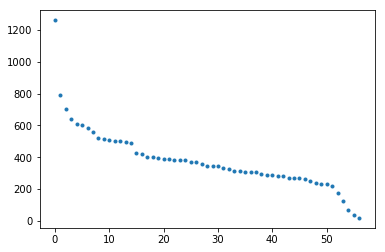

In [22]:
plt.plot(df['feat_import'],'.')

In [21]:
gbmpredict = model.predict(dtest)
df_test = df_test.copy()
df_test['gbmpredict']=0
df_test = df_test[['file_id','gbmpredict']].copy()
df_test['gbmpredict'] = gbmpredict
#df_test.to_csv('lgbval.csv',index=False)

In [22]:
df_test.columns = ['file_id','xgbcat']
df_test.to_csv('xgbcat_val.csv',index=False)